# Funcionamento do algoritmo de Transformada Rápida de Fourier (FFT - Fast Fourier Transform) com decimação do tempo (Radix-2).
## Alunos: Rafael Ramos, Matheus Macário, Maria Eduarda e Saulo Santos

In [60]:
import serial
import time
import numpy as np
import matplotlib.pyplot as plt

In [61]:
# Gerar sinal com Ruído
def generate_noisy_signal(frequency, amplitude, noise_amplitude, duration, sample_rate, sample_rate_n):
    print(f"Gerando sinal com frequência {frequency}Hz e amplitude {amplitude}")
    t = np.arange(0, sample_rate_n * duration, duration)
    signal = amplitude * np.sin(2 * np.pi * frequency * t)  
    noise = (noise_amplitude * np.sin(2 * np.pi * 100 * t) +  
             0.1 * np.sin(2 * np.pi * 250 * t) + 
             0.15 * np.sin(2 * np.pi * 350 * t)) 
    noisy_signal = signal + noise 
    print(f"Sinal com ruído gerado com {len(t)} pontos de amostragem")
    noisy_signal = [round(i, 6) for i in noisy_signal]
    return t, noisy_signal

In [62]:
def transmit_signal_and_get_filtered(serial_port, signal):
    filtered_values = []

    for value in signal:
        # Envia o valor formatado e codificado em uma única linha
        serial_port.write(f'{value}\n'.encode())

        # Aguarda a resposta de forma eficiente
        while not serial_port.in_waiting:
            continue

        # Lê a resposta e armazena como float diretamente
        filtered = float(serial_port.readline().strip())
        filtered_values.append(filtered)

    return filtered_values

In [63]:
# Função para calcular a FFT
def calculate_fft(signal, sample_rate):
    N = len(signal)
    fft_result = np.fft.fft(signal)
    fft_freq = np.fft.fftfreq(N, d=1/sample_rate)
    amplitude_spectrum = 2.0/N * np.abs(fft_result[:N//2])
    return fft_freq[:N//2], amplitude_spectrum

Iniciando a geração do sinal com ruído...
Gerando sinal com frequência 5Hz e amplitude 0.75
Sinal com ruído gerado com 8192 pontos de amostragem
Conectando ao Arduino...
Enviando o sinal para o Arduino e recebendo o sinal filtrado...
Conexão serial com o Arduino fechada
Calculando a FFT dos sinais...
Plotando os gráficos...


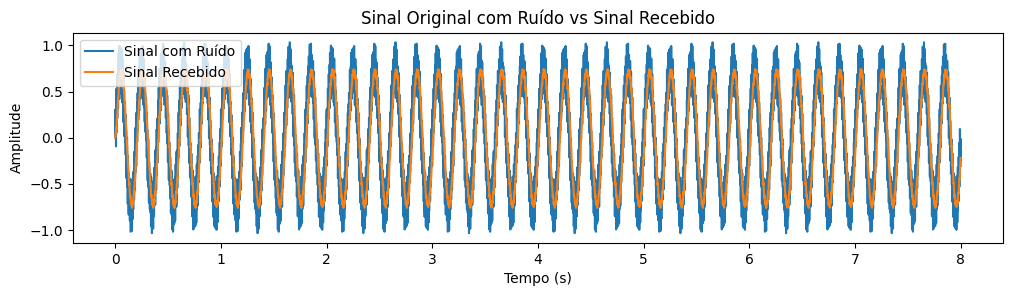

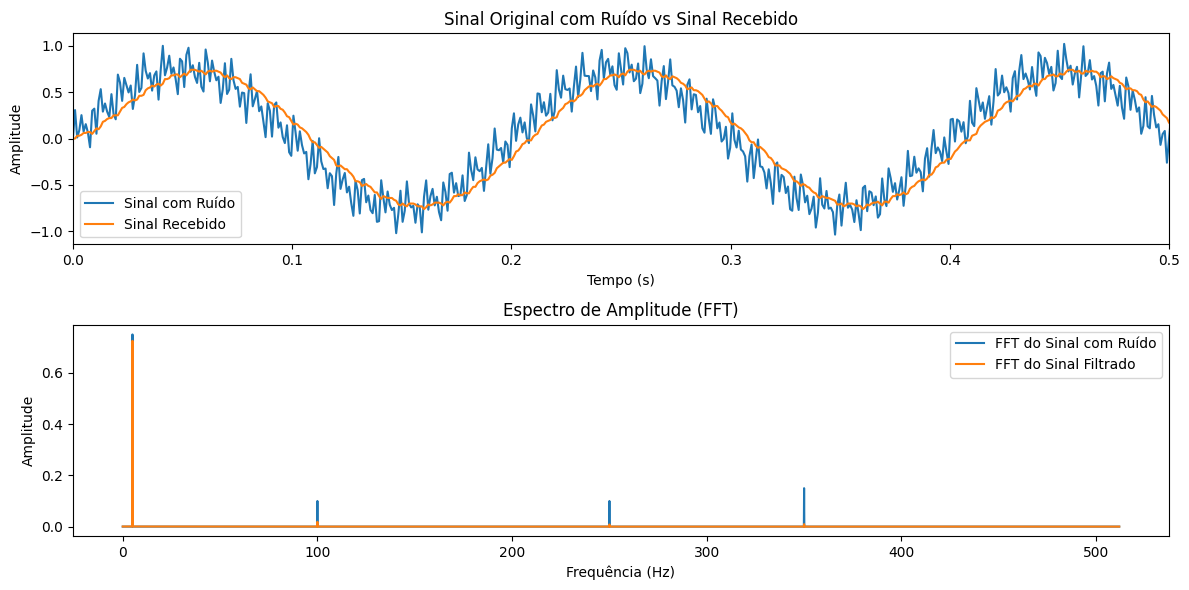

In [64]:
# Parâmetros do sinal
frequency = 5   
amplitude = 0.75  
noise_amplitude = 0.1 
sample_rate = 1024
duration = 1.0/sample_rate
sample_rate_n = 8192

print("Iniciando a geração do sinal com ruído...")
t, noisy_signal = generate_noisy_signal(frequency, amplitude, noise_amplitude, duration, sample_rate, sample_rate_n)

print("Conectando ao Arduino...")
# Conexão com o Arduino
arduino_serial = serial.Serial('COM6', 115200)
time.sleep(2)

print("Enviando o sinal para o Arduino e recebendo o sinal filtrado...")
filtered_signal = transmit_signal_and_get_filtered(arduino_serial, noisy_signal)

arduino_serial.close()
print("Conexão serial com o Arduino fechada")

print("Calculando a FFT dos sinais...")
fft_freq, fft_amplitude_noisy = calculate_fft(noisy_signal, sample_rate)
fft_freq_filtered, fft_amplitude_filtered = calculate_fft(filtered_signal, sample_rate)


print("Plotando os gráficos...")
# Gráfico comparativo do sinal original e filtrado
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, noisy_signal, label='Sinal com Ruído')
plt.plot(t, filtered_signal, label='Sinal Recebido')
plt.title('Sinal Original com Ruído vs Sinal Recebido')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.legend()

# Gráfico comparativo do sinal original e filtrado com zoom
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, noisy_signal, label='Sinal com Ruído')
plt.plot(t, filtered_signal, label='Sinal Recebido') 
plt.title('Sinal Original com Ruído vs Sinal Recebido')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.xlim(0, 0.5)
plt.legend()


# Gráfico da FFT (Amplitude da DFT)
plt.subplot(2, 1, 2)
plt.plot(fft_freq, fft_amplitude_noisy, label='FFT do Sinal com Ruído')
plt.plot(fft_freq, fft_amplitude_filtered, label='FFT do Sinal Filtrado')
plt.title('Espectro de Amplitude (FFT)')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude')
plt.legend()

# Exibir gráficos
plt.tight_layout()
plt.show()